In [1]:
import sys
sys.path.append("..")
from functions.functions import * 

# Preprocessing

In [2]:
X_train, X_test, X_val, y_train, y_test, y_val = preprocess(file_paths)

# Feature Selection

In [5]:
# Selected features
selected_features = ['minimum_nights', 
                     'number_of_reviews', 
                     'reviews_per_month', 
                     'calculated_host_listings_count', 
                     'availability_365',
                     'Host Response Rate', 
                     'Accommodates', 
                     'Bathrooms', 
                     'Bedrooms', 
                     'Beds', 
                     'Square Feet',
                     'recency_last_review' ,
                     'last_review_day', 
                     'last_review_month', 
                     'last_review_year', 
                     'room_type_Entire home/apt', 
                     'room_type_Private room', 
                     'room_type_Shared room',
                     'mean_target_neighbourhood',
                     'mean_target_neighbourhood_group',
                     'neighbourhood_group_Bronx', 
                     'neighbourhood_group_Brooklyn',
                     'neighbourhood_group_Manhattan',
                     'neighbourhood_group_Queens',
                     'neighbourhood_group_Staten Island',
                     'x', 
                     'y', 
                     'z',
                     'text_encoding_tsne_1',
                     'text_encoding_tsne_2']


# Prepare feature matrices
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_val_selected = X_val[selected_features]

X_train_np = X_train_selected.to_numpy()
X_test_np = X_test_selected.to_numpy()
X_val_np = X_val_selected.to_numpy()

scaler = MinMaxScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)
X_val_np = scaler.transform(X_val_np)

y_train_np = y_train.to_numpy().flatten()
y_test_np = y_test.to_numpy().flatten()
y_val_np = y_val.to_numpy().flatten()

X_test_selected.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,...,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,x,y,z,text_encoding_tsne_1,text_encoding_tsne_2
27357,3,4,2.45,1,23,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208824,-0.728089,0.652900,-7.517027,-0.076676
17998,1,35,2.75,10,156,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208893,-0.728482,0.652440,-7.517027,-0.076676
11703,3,16,0.62,4,37,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1,0,0,0,0.209660,-0.728891,0.651737,-7.517027,-0.076676
25026,1,0,0.00,10,284,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208956,-0.727793,0.653188,-7.517027,-0.076676
31283,1,0,0.00,1,43,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1,0,0,0,0.209579,-0.728689,0.651989,-7.517027,-0.076676


# Adaboost

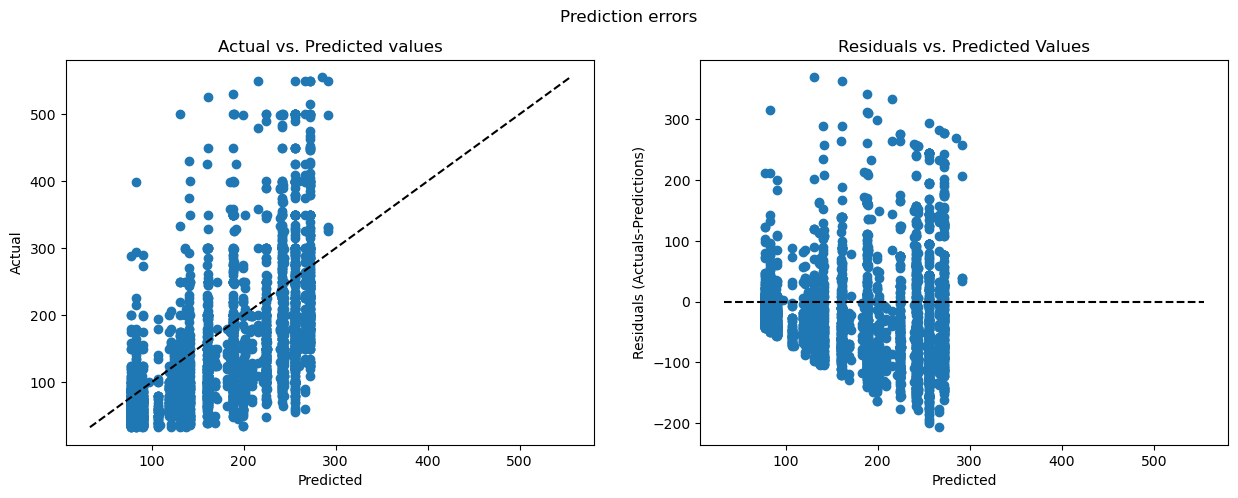

R²: 0.32951501804166816
MAE: 60.20120498711357
MSE: 5998.334539266891
RMSE: 77.44891567521711
MAPE: 0.5782701741311225
error_ratio_rmse: 0.5599682460784724
error_ratio_mae: 0.4352644949841652


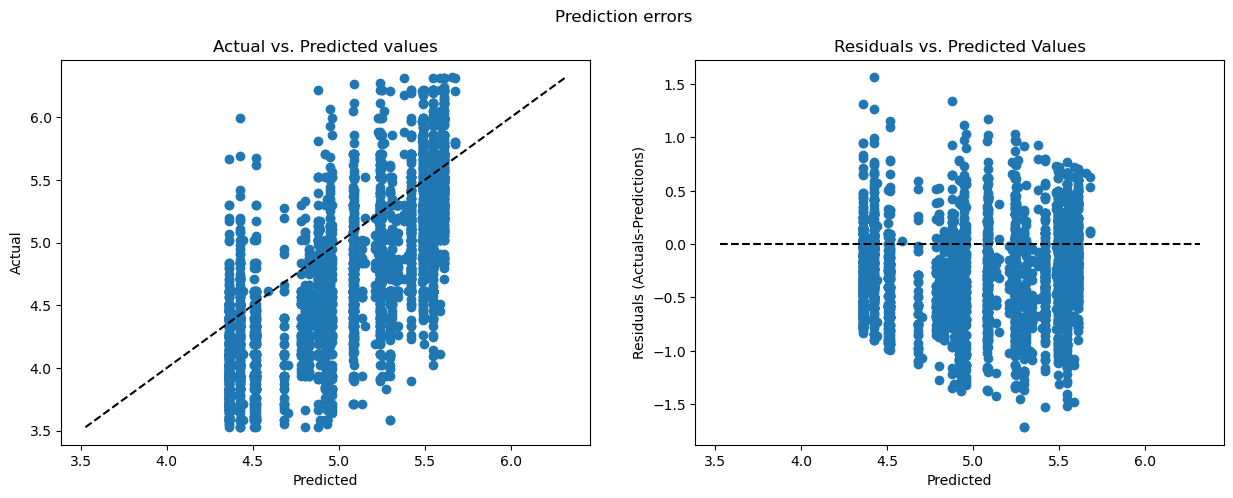

R²: 0.3111019320865618
MAE: 0.42701310775989487
MSE: 0.26772671624046374
RMSE: 0.5174231500816945
MAPE: 0.09522147066561465
error_ratio_rmse: 0.10920415036909233
error_ratio_mae: 0.09012276242766187


In [6]:
model_init = AdaBoostRegressor().fit(X_train_np, y_train_np)
y_pred = np.maximum(0,model_init.predict(X_test_np))

# score for price
model_init_score=scores(y_test_np,y_pred,plot= True)

# score for log_price
model_init_logscore=scores(np.log(y_test_np+1),np.log(y_pred+1),plot= True)

#### Model Tuning

In [7]:
space={
        'n_estimators': hp.choice('n_estimators', range(50, 400)),
        'learning_rate': hp.loguniform('learning_rate', -5, 0),
        'loss': hp.choice('loss', ['linear', 'square', 'exponential']),
        'random_state': hp.choice('random_state',range(0,400))
}

def objective(space):
    mod=AdaBoostRegressor(**space)
    
    mod.fit(X_train_np, y_train_np)

    y_pred = mod.predict(X_test_np)
    score = scores(y_test_np, y_pred)['RMSE']
    print ("SCORE:", score)

    return {'loss': score, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

R²: -2.157266461626477                                                                                                 
MAE: 157.7713992500432                                                                                                 
MSE: 28245.73402245124                                                                                                 
RMSE: 168.06467214275355                                                                                               
MAPE: 1.9567368468986561                                                                                               
error_ratio_rmse: 1.2151348907476798                                                                                   
error_ratio_mae: 1.1407128550369525                                                                                    
SCORE:                                                                                                                 
168.06467214275355                      

MAE: 64.65814150580515                                                                                                 
MSE: 6467.0754672126295                                                                                                
RMSE: 80.41812897110097                                                                                                
MAPE: 0.6424437661817206                                                                                               
error_ratio_rmse: 0.5814361407162923                                                                                   
error_ratio_mae: 0.4674888702836302                                                                                    
SCORE:                                                                                                                 
80.41812897110097                                                                                                      
R²: -1.8953809442583762                 

MSE: 5136.903720718657                                                                                                 
RMSE: 71.67219628781203                                                                                                
MAPE: 0.4210453247782893                                                                                               
error_ratio_rmse: 0.5182016261684169                                                                                   
error_ratio_mae: 0.36021195020816926                                                                                   
SCORE:                                                                                                                 
71.67219628781203                                                                                                      
R²: 0.4265162163923193                                                                                                 
MAE: 49.13352486540654                  

RMSE: 77.57751277343434                                                                                                
MAPE: 0.5958122238389425                                                                                               
error_ratio_rmse: 0.5608980239961059                                                                                   
error_ratio_mae: 0.44266198588207134                                                                                   
SCORE:                                                                                                                 
77.57751277343434                                                                                                      
R²: -1.146662131252675                                                                                                 
MAE: 128.68317739838616                                                                                                
MSE: 19204.602567562677                 

MAPE: 1.7113672466299181                                                                                               
error_ratio_rmse: 1.102637600433205                                                                                    
error_ratio_mae: 1.033978290564495                                                                                     
SCORE:                                                                                                                 
152.50523067036124                                                                                                     
R²: 0.40393407094777056                                                                                                
MAE: 53.533865039428676                                                                                                
MSE: 5332.562169358767                                                                                                 
RMSE: 73.02439434434747                 

error_ratio_rmse: 0.5207435189112283                                                                                   
error_ratio_mae: 0.3681992682492382                                                                                    
SCORE:                                                                                                                 
72.02376414558276                                                                                                      
R²: 0.3033244463686888                                                                                                 
MAE: 63.45232282019478                                                                                                 
MSE: 6232.642264117527                                                                                                 
RMSE: 78.94708521609601                                                                                                
MAPE: 0.6274417837307026                

error_ratio_mae: 0.46920178565084375                                                                                   
SCORE:                                                                                                                 
82.54333363330197                                                                                                      
R²: 0.42634692590622514                                                                                                
MAE: 49.65197671305568                                                                                                 
MSE: 5132.050889257893                                                                                                 
RMSE: 71.6383339369216                                                                                                 
MAPE: 0.4182490079968677                                                                                               
error_ratio_rmse: 0.5179567958687168    

In [9]:
best_hyperparams = {'learning_rate': 0.006836494509115601,
                     'loss': 'exponential',
                     'n_estimators': 141,
                     'random_state': 20}

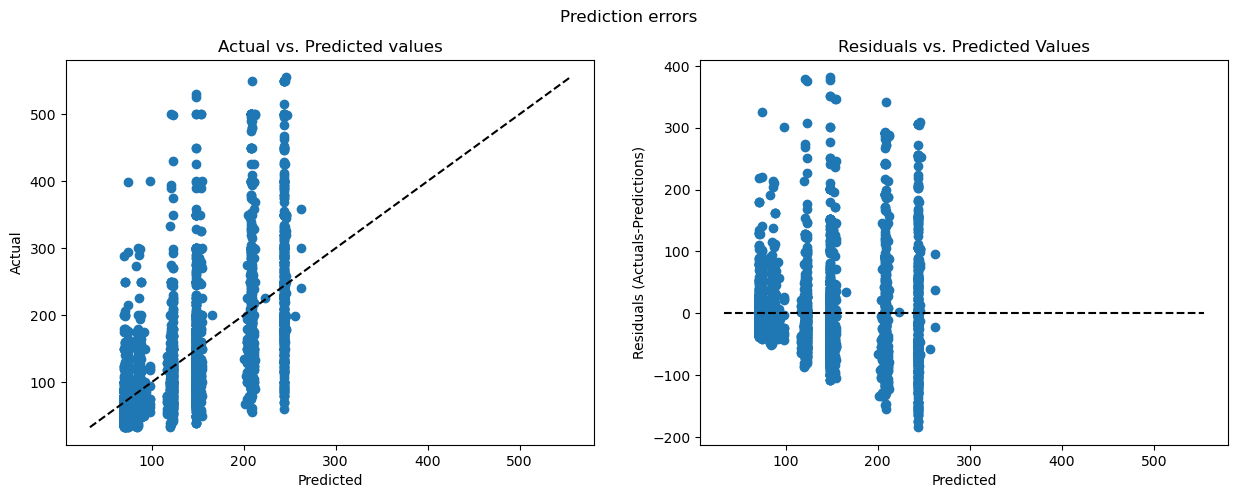

R²: 0.4260360827605809
MAE: 48.83235880720346
MSE: 5134.831773583393
RMSE: 71.65774050012597
MAPE: 0.4034292026253855
error_ratio_rmse: 0.5180971084743256
error_ratio_mae: 0.3530658896221882


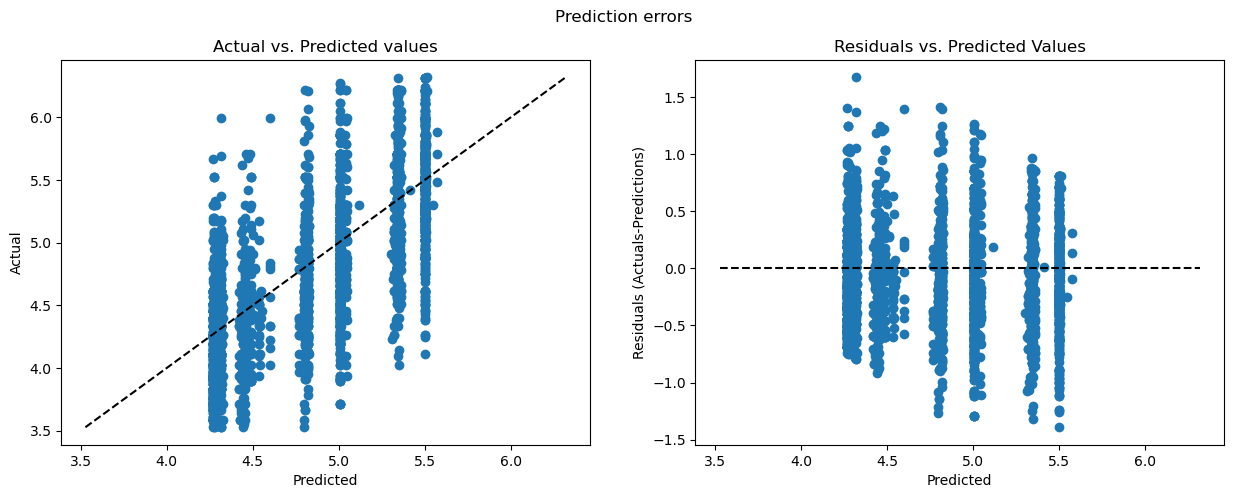

R²: 0.5183531824221397
MAE: 0.3454738636729259
MSE: 0.18718258457068732
RMSE: 0.4326460268749585
MAPE: 0.075080673526983
error_ratio_rmse: 0.09131161172047225
error_ratio_mae: 0.07291359064852986


In [10]:
model_tuned = AdaBoostRegressor(**best_hyperparams)

model_tuned.fit(X_train_np, y_train_np)

y_pred = np.maximum(0,model_tuned.predict(X_test_np))
model_tuned_score = scores(y_test_np,y_pred,plot=True)
model_tuned_logscore= scores(np.log(y_test_np+1),np.log(y_pred+1),plot= True)

In [11]:
adaboost_params = model_tuned.get_params()

# Save the parameters as a JSON file
with open('saved_models/adaboost_params.json', 'w') as f:
    json.dump(adaboost_params, f)

# # Load the parameters from the JSON file
# with open('dt_params.json', 'r') as f:
#     dt_params = json.load(f)

# # Create a new decision tree with the same parameters
# dt = DecisionTreeRegressor(**dt_params)